               Name Description  \
0        Roslindale               
1     Jamaica Plain               
2      Mission Hill               
3          Longwood               
4       Bay Village               
5  Leather District               
6         Chinatown               
7         North End               
8           Roxbury               
9         South End               

                                            geometry  
0  MULTIPOLYGON (((-71.12593 42.27201, -71.12611 ...  
1  POLYGON ((-71.10499 42.32610, -71.10503 42.326...  
2  POLYGON ((-71.09043 42.33577, -71.09050 42.335...  
3  POLYGON ((-71.09811 42.33673, -71.09832 42.337...  
4  POLYGON ((-71.06663 42.34878, -71.06663 42.348...  
5  POLYGON ((-71.05838 42.34983, -71.05834 42.349...  
6  POLYGON ((-71.05791 42.35238, -71.05811 42.352...  
7  POLYGON ((-71.05200 42.36884, -71.05219 42.368...  
8  POLYGON ((-71.09646 42.29323, -71.09633 42.293...  
9  POLYGON ((-71.06834 42.34775, -71.06913 42.347...  


<Figure size 432x288 with 0 Axes>

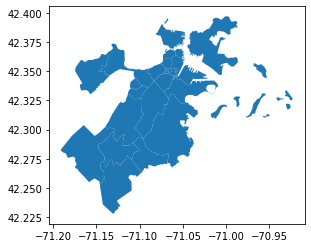

In [31]:
import shapely
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

def within_shape(df, shapes):
    in_shape = []
    for sh in shapes.geometry:
        within = df.within(sh)
        in_shape.append(within)
    return in_shape

plt.clf()

DATAFOLDER = "../../data/"

#gdf = geopandas.read_file('/Users/kellyduncan/Downloads/Boston_Neighborhoods-shp/Boston_Neighborhoods.shp')
gdf = geopandas.read_file(DATAFOLDER + "shapefiles/Boston_Neighborhoods.kml", driver='KML')

print(gdf.head(10))#print(gdf[gdf.Name.eq("Beacon Hill")])
gdf.plot()
plt.show()

In [32]:
final_boston = pd.read_csv(DATAFOLDER + "boston-licenses/boston-licenses-clean.csv")

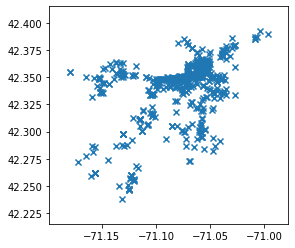

In [38]:
gdf2 = geopandas.GeoDataFrame(final_boston, geometry=geopandas.points_from_xy(final_boston.Long, final_boston.Lat))
gdf2.plot(marker="x")
plt.show()

           Name Description                                           geometry
14  Beacon Hill              POLYGON ((-71.07141 42.36119, -71.07308 42.361...
14    POLYGON ((-71.07141 42.36119, -71.07308 42.361...
Name: geometry, dtype: geometry
                           BUSINESSNAME                 ISSDTTM  \
0              SPEAK EASY CONCEPTS, LLC  11/27/2013 12:00:00 AM   
1                      FROST GROUP, LLC  11/20/2013 12:00:00 AM   
2              EMANUEL ENTERPRISES, LLC  10/01/2013 12:00:00 AM   
3            25 CHARLES ON THE HILL LLC  11/20/2013 12:00:00 AM   
4                       SUYA JOINT, LLC  09/18/2015 12:00:00 AM   
5                   GOURMET CHINA, INC.  11/25/2013 12:00:00 AM   
6                       THE TWELVE BENS  11/29/2013 12:00:00 AM   
7            HLC GROUP ENTERPRISES, LLC  11/15/2013 12:00:00 AM   
8                   THE NEXT PLACE, LLC  11/29/2013 12:00:00 AM   
9      MASSACHUSETTS SPORTSERVICE, INC.  11/27/2013 12:00:00 AM   
10         BARRY'

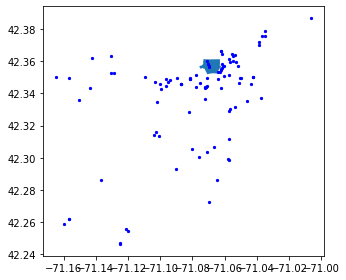

In [42]:
point = (-71.07136,42.35576)
point2 = (42.35576,-71.07136)

fig, ax = plt.subplots()

beacon_hill = gdf[gdf.Name.eq("Beacon Hill")]
print(beacon_hill)
beacon_hill.plot(ax=ax)

gdf2.head(100).plot(ax=ax, color='blue', markersize=5)
plt.tight_layout()

print(beacon_hill['geometry'])
new_point = shapely.geometry.Point(point)
beacon_hill.geometry.contains(new_point)
#new_point.within(beacon_hill['geometry'])
#shapely.geometry.shape(beacon_hill)
#print(gdf['geometry'])

gdf2['neighborhood'] = None
for index, row in gdf2.iterrows():
    for name in gdf['Name']:
        if gdf[gdf.Name.eq(name)].geometry.contains(row.geometry).bool():
            gdf2.at[index,'neighborhood'] = name
    #if index > 100:
    #    break
print(gdf2.head(100))

In [43]:
gdf2

,BUSINESSNAME,ISSDTTM,EXPDTTM,LICCAT,LICCATDESC,CAPACITY,STNO,Address,Location,Lat,Long,geometry,neighborhood
0,"SPEAK EASY CONCEPTS, LLC",11/27/2013 12:00:00 AM,12/31/2016 12:00:00 AM,GOPAL,GOP All Alc.,520,25,Boylston PL,"(42.351899, -71.065829)",42.316248,-71.102627,POINT (-71.10263 42.31625),Jamaica Plain
1,"FROST GROUP, LLC",11/20/2013 12:00:00 AM,12/31/2016 12:00:00 AM,GOPAL,GOP All Alc.,240,200,State ST,"(42.36003, -71.05319)",42.359488,-71.053154,POINT (-71.05315 42.35949),Downtown
2,"EMANUEL ENTERPRISES, LLC",10/01/2013 12:00:00 AM,12/31/2016 12:00:00 AM,GOPMWL,GOP Malt Wine Liq.,49,71,Meridian St,"(42.37195, -71.0388)",42.371963,-71.038805,POINT (-71.03881 42.37196),East Boston
3,25 CHARLES ON THE HILL LLC,11/20/2013 12:00:00 AM,12/31/2016 12:00:00 AM,INNAL,Inn. All Alc.,0,19,Charles ST,"(42.356811, -71.069554)",42.356813,-71.069562,POINT (-71.06956 42.35681),Beacon Hill
4,"SUYA JOINT, LLC",09/18/2015 12:00:00 AM,12/31/2016 12:00:00 AM,CV7ALN,CV7ALN - Neighborhood Restricted,84,185,Dudley ST,"(42.32832, -71.08196)",42.328465,-71.082149,POINT (-71.08215 42.32846),Roxbury
5,"GOURMET CHINA, INC.",11/25/2013 12:00:00 AM,12/31/2016 12:00:00 AM,CV7MW,CV7 Malt Wine,48,23,Tyler St,"(42.350769, -71.060935)",42.246234,-71.124994,POINT (-71.12499 42.24623),Hyde Park
6,THE TWELVE BENS,11/29/2013 12:00:00 AM,12/31/2016 12:00:00 AM,CV7AL,CV7 All Alc.,285,315,Adams ST,"(42.298605, -71.057578)",42.298611,-71.057467,POINT (-71.05747 42.29861),Dorchester
7,"HLC GROUP ENTERPRISES, LLC",11/15/2013 12:00:00 AM,12/31/2016 12:00:00 AM,CV7AL,CV7 All Alc.,148,131,Dartmouth St,"(42.34682, -71.07543)",42.346710,-71.075396,POINT (-71.07540 42.34671),South End
8,"THE NEXT PLACE, LLC",11/29/2013 12:00:00 AM,12/31/2016 12:00:00 AM,CV7AL,CV7 All Alc.,440,262,Friend ST,"(42.36457, -71.06144)",42.364652,-71.061379,POINT (-71.06138 42.36465),West End
9,"MASSACHUSETTS SPORTSERVICE, INC.",11/27/2013 12:00:00 AM,12/31/2016 12:00:00 AM,CV7AL,CV7 All Alc.,19058,100,Legends WY,"(42.36629, -71.0622)",42.366290,-71.062226,POINT (-71.06223 42.36629),West End


In [40]:
# save as CSV
gdf2.to_csv(DATAFOLDER + "boston-licenses/boston-licenses-with-labels.csv", index = False)